# CLIP Usage

In [1]:
from PIL import Image
import torch
import requests
from transformers import CLIPProcessor, CLIPModel
from matplotlib import pyplot as plt

We initialize the model from HuggingFace. Note that the `processor` includes both the tokenizer and the image processor, which would normally be separate.

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

To demonstrate the model, we download and display an image of cats from the COCO dataset.

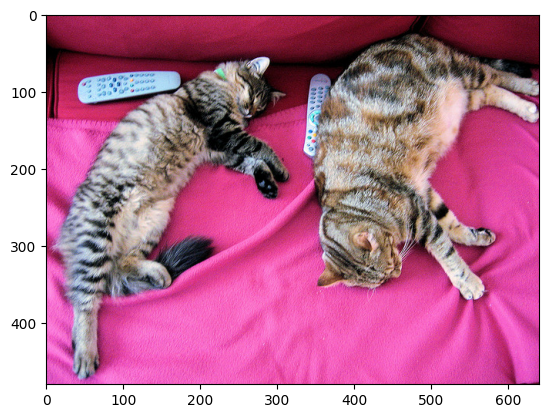

In [3]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

Now we can take this image along with some possible captions, pass it through the processor, and get back the label probabilities from CLIP.

In [4]:
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
for prob, label in zip(probs[0], ("cat", "dog")):
    print(f"{label}: {prob}")

cat: 0.9948580265045166
dog: 0.005141981411725283


## Resources:
* [HF CLIP Usage](https://huggingface.co/docs/transformers/en/model_doc/clip#usage-tips-and-example)